# Modeling

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/california_wildfires.csv')

In [3]:
df.head()

,Unnamed: 0,date,county,year,acres_burned,fire_started,Unnamed: 0.1,Alfalfa & Hay_acres,Alfalfa & Hay_percentage,Almonds_acres,Almonds_percentage,Barren_acres,Barren_percentage,Corn_acres,Corn_percentage,Cotton_acres,Cotton_percentage,Deciduous Forest_acres,Deciduous Forest_percentage,Evergreen Forest_acres,Evergreen Forest_percentage,Fallow_acres,Fallow_percentage,Fruit Trees_acres,Fruit Trees_percentage,Grain Crops_acres,Grain Crops_percentage,Grapes_acres,Grapes_percentage,Grassland_acres,Grassland_percentage,High Intensity Developed_acres,High Intensity Developed_percentage,Low Intensity Developed_acres,Low Intensity Developed_percentage,Mixed Forest_acres,Mixed Forest_percentage,Other Ocean/Mexico_acres,Other Ocean/Mexico_percentage,Other Tree Crops_acres,Other Tree Crops_percentage,Other_acres,Other_percentage,Rice_acres,Rice_percentage,Shrubland_acres,Shrubland_percentage,Tomatoes_acres,Tomatoes_percentage,Vegs & Fruits_acres,Vegs & Fruits_percentage,Walnuts_acres,Walnuts_percentage,Water_acres,Water_percentage,Wetlands_acres,Wetlands_percentage,Winter Wheat_acres,Winter Wheat_percentage,max_elevation,min_elevation,Avg Air Temp (F)_Weekly,Avg Rel Hum (%)_Weekly,Avg Wind Speed (mph)_Weekly,Dew Point (F)_Weekly,Max Air Temp (F)_Weekly,Max Rel Hum (%)_Weekly,Min Air Temp (F)_Weekly,Min Rel Hum (%)_Weekly,Precip (in)_Weekly,Avg Air Temp (F)_month,Avg Rel Hum (%)_month,Avg Wind Speed (mph)_month,Dew Point (F)_month,Max Air Temp (F)_month,Max Rel Hum (%)_month,Min Air Temp (F)_month,Min Rel Hum (%)_month,Precip (in)_month
0,0,2013-01-06,Alameda,2013,0.0,0.0,2,1102.856805,0.300074,4.225505,0.001150,194.595625,0.052947,4.670295,0.001271,0.000000,0.000000,5.337480,0.001452,7838.756565,2.132827,1536.749450,0.418130,1.779160,0.000484,991.214515,0.269697,3722.447510,1.012831,153671.386680,41.812059,28431.421590,7.735834,39470.886995,10.739534,74885.956375,20.375531,0.0,0.0,8.673405,0.002360,0.0,0.0,0.889580,0.000242,30958.051185,8.423298,4.670295,0.001271,164.127510,0.044657,4.670295,0.001271,19403.518960,5.279454,4497.494085,1.223712,624.485160,0.169915,1242,-42,44.214286,82.785714,2.392857,39.321429,54.157143,96.500000,35.771429,60.785714,0.095714,45.506897,78.189655,2.915517,38.932759,55.896552,95.448276,35.725862,55.810345,0.130172
1,1,2013-01-06,Alpine,2013,0.0,0.0,2,189.035750,0.040080,0.000000,0.000000,15482.472715,3.282650,0.000000,0.000000,0.000000,0.000000,194.595625,0.041259,195088.007530,41.363269,0.444790,0.000094,0.222395,0.000047,0.000000,0.000000,0.000000,0.000000,5644.829890,1.196837,121.427670,0.025746,3192.480225,0.676881,0.667185,0.000141,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,247783.390805,52.535935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2650.503610,0.561969,1297.452430,0.275091,0.000000,0.000000,3556,1442,29.657143,76.514286,3.228571,21.328571,34.428571,91.857143,22.857143,55.428571,0.000000,30.789655,68.162069,4.968966,19.600000,39.344828,86.000000,22.758621,46.344828,0.000000
2,2,2013-01-06,Amador,2013,0.0,0.0,2,1326.808570,0.414290,16.679625,0.005208,1873.010690,0.584840,242.632945,0.075761,0.000000,0.000000,17190.911105,5.367789,114386.866695,35.716810,168.130620,0.052498,12.009330,0.003750,120.093300,0.037499,2587.343430,0.807887,112912.610240,35.256480,440.119705,0.137425,8263.975805,2.580391,1727.119570,0.539286,0.0,0.0,1.334370,0.000417,0.0,0.0,1.111975,0.000347,52457.865415,16.379744,0.000000,0.000000,1.779160,0.000556,122.094855,0.038124,5822.745890,1.818128,105.860020,0.033054,479.483620,0.149717,3121,43,34.114286,83.571429,3.157143,29.585714,40.071429,96.000000,27.757143,66.571429,0.141429,34.289655,76.724138,3.606897,27.410345,41.200000,93.172414,27.768966,58.310345,0.155517
3,3,2013-01-06,Butte,2013,0.0,0.0,2,3777.156680,0.374865,46196.556585,4.584787,1869.452370,0.185534,2023.349710,0.200808,9.118195,0.000905,33181.556395,3.293111,408193.790775,40.511281,56434.510410,5.600855,10563.317710,1.048359,2628.041715,0.260821,247.525635,0.024566,170758.216925,16.946936,4421.6

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18154 entries, 0 to 18153
Data columns (total 79 columns):
Unnamed: 0                             18154 non-null int64
date                                   18154 non-null object
county                                 18154 non-null object
year                                   18154 non-null int64
acres_burned                           18154 non-null float64
fire_started                           18154 non-null float64
Unnamed: 0.1                           18154 non-null int64
Alfalfa & Hay_acres                    18154 non-null float64
Alfalfa & Hay_percentage               18154 non-null float64
Almonds_acres                          18154 non-null float64
Almonds_percentage                     18154 non-null float64
Barren_acres                           18154 non-null float64
Barren_percentage                      18154 non-null float64
Corn_acres                             18154 non-null float64
Corn_percentage                

In [4]:
counties = pd.get_dummies(df.county, drop_first = True)
df2 = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'county', 'year', 'acres_burned'], axis = 1)

In [7]:
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2.drop(columns = ['date'], axis = 1, inplace = True)

In [8]:
df2 = pd.concat([df2, counties], axis = 1)

In [9]:
df2.head()

,fire_started,Alfalfa & Hay_acres,Alfalfa & Hay_percentage,Almonds_acres,Almonds_percentage,Barren_acres,Barren_percentage,Corn_acres,Corn_percentage,Cotton_acres,Cotton_percentage,Deciduous Forest_acres,Deciduous Forest_percentage,Evergreen Forest_acres,Evergreen Forest_percentage,Fallow_acres,Fallow_percentage,Fruit Trees_acres,Fruit Trees_percentage,Grain Crops_acres,Grain Crops_percentage,Grapes_acres,Grapes_percentage,Grassland_acres,Grassland_percentage,High Intensity Developed_acres,High Intensity Developed_percentage,Low Intensity Developed_acres,Low Intensity Developed_percentage,Mixed Forest_acres,Mixed Forest_percentage,Other Ocean/Mexico_acres,Other Ocean/Mexico_percentage,Other Tree Crops_acres,Other Tree Crops_percentage,Other_acres,Other_percentage,Rice_acres,Rice_percentage,Shrubland_acres,Shrubland_percentage,Tomatoes_acres,Tomatoes_percentage,Vegs & Fruits_acres,Vegs & Fruits_percentage,Walnuts_acres,Walnuts_percentage,Water_acres,Water_percentage,Wetlands_acres,Wetlands_percentage,Winter Wheat_acres,Winter Wheat_percentage,max_elevation,min_elevation,Avg Air Temp (F)_Weekly,Avg Rel Hum (%)_Weekly,Avg Wind Speed (mph)_Weekly,Dew Point (F)_Weekly,Max Air Temp (F)_Weekly,Max Rel Hum (%)_Weekly,Min Air Temp (F)_Weekly,Min Rel Hum (%)_Weekly,Precip (in)_Weekly,Avg Air Temp (F)_month,Avg Rel Hum (%)_month,Avg Wind Speed (mph)_month,Dew Point (F)_month,Max Air Temp (F)_month,Max Rel Hum (%)_month,Min Air Temp (F)_month,Min Rel Hum (%)_month,Precip (in)_month,month,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Imperial,Inyo,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Modoc,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Sierra,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
0,0.0,1102.856805,0.300074,4.225505,0.001150,194.595625,0.052947,4.670295,0.001271,0.000000,0.000000,5.337480,0.001452,7838.756565,2.132827,1536.749450,0.418130,1.779160,0.000484,991.214515,0.269697,3722.447510,1.012831,153671.386680,41.812059,28431.421590,7.735834,39470.886995,10.739534,74885.956375,20.375531,0.0,0.0,8.673405,0.002360,0.0,0.0,0.889580,0.000242,30958.051185,8.423298,4.670295,0.001271,164.127510,0.044657,4.670295,0.001271,19403.518960,5.279454,4497.494085,1.223712,624.485160,0.169915,1242,-42,44.214286,82.785714,2.392857,39.321429,54.157143,96.500000,35.771429,60.785714,0.095714,45.506897,78.189655,2.915517,38.932759,55.896552,95.448276,35.725862,55.810345,0.130172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,189.035750,0.040080,0.000000,0.000000,15482.472715,3.282650,0.000000,0.000000,0.000000,0.000000,194.595625,0.041259,195088.007530,41.363269,0.444790,0.000094,0.222395,0.000047,0.000000,0.000000,0.000000,0.000000,5644.829890,1.196837,121.427670,0.025746,3192.480225,0.676881,0.667185,0.000141,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,247783.390805,52.535935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2650.503610,0.561969,1297.452430,0.275091,0.000000,0.000000,3556,1442,29.657143,76.514286,3.228571,21.328571,34.428571,91.857143,22.857143,55.428571,0.000000,30.789655,68.162069,4.968966,19.600000,39.344828,86.000000,22.758621,46.344828,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1326.808570,0.414290,16.679625,0.005208,1873.010690,0.584840,242.632945,0.075761,0.000000,0.000000,17190.911105,5.367789,114386.866695,35.716810,168.130620,0.052498,12.009330,0.003750,120.093300,0.037499,2587.343430,0.807887,112912.610240,35.256480,440.119705,0.137425,8263.975805,2.580391,1727.119570,0.539286,0.0,0.0,1.334370,0.000417,0.0,0.0,1.111975,0.000347,52457.865415,16.379744,0.000000,0.000000,1.779160,0

In [10]:
y = df2.fire_started
X = df2.drop(columns = ['fire_started'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.25, random_state = 0)

## Logistic Regression

### Base Model

First we create a baseline model to make sure that the data can run through the model.

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [14]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix
print(f1_score(y_train, y_hat_train), f1_score(y_test, y_hat_test))
print(accuracy_score(y_train, y_hat_train), accuracy_score(y_test, y_hat_test))
print(recall_score(y_train, y_hat_train), recall_score(y_test, y_hat_test))

0.0 0.0
0.9410209327947117 0.9358889623265036
0.0 0.0


/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
confusion_matrix(y_test, y_hat_test)

array([[4248,    1],
       [ 290,    0]])

In this case, the model is predicting that there is never a fire in California. Part of the problem, is the class imbalance. So the first change to make to the model is to account for class imbalance.

### Model - 'Balanced' Class Weight

For the next model, we attempt to take into account the class imbalance by making the `class_weight` equal to `balanced`.

In [16]:
logreg1 = LogisticRegression(class_weight = 'balanced')
logreg1.fit(X_train, y_train)

/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_hat_train1 = logreg1.predict(X_train)
y_hat_test1 = logreg1.predict(X_test)

In [18]:
print(f1_score(y_train, y_hat_train1), f1_score(y_test, y_hat_test1))
print(accuracy_score(y_train, y_hat_train1), accuracy_score(y_test, y_hat_test1))
print(recall_score(y_train, y_hat_train1), recall_score(y_test, y_hat_test1))

0.1928071928071928 0.1978557504873294
0.643922144693353 0.6373650583829037
0.7210460772104608 0.7


From our metrics, we notice that the recall is higher than the accuracy and there is a large difference between the recall and f1 score. We want to take a closer look by using a confusion matrix.

In [19]:
confusion_matrix(y_test, y_hat_test1)

array([[2690, 1559],
       [  87,  203]])

From the above matrix, the large majority of our error is from falsely predicting that there is going to be a fire, when there is none. To deal with this, we will first plot the precision-recall curve.

In [20]:
from sklearn.metrics import roc_curve

In [21]:
y_score = logreg1.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score)

/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


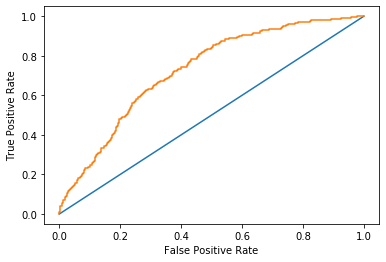

In [22]:
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
logreg2 = LogisticRegression(class_weight = {1:5, 0:1}, solver = 'liblinear')
logreg2.fit(X_train, y_train)

In [ ]:
y_hat_train2 = logreg2.predict(X_train)
y_hat_test2 = logreg2.predict(X_test)

In [ ]:
print(f1_score(y_train, y_hat_train2), f1_score(y_test, y_hat_test2))
print(accuracy_score(y_train, y_hat_train2), accuracy_score(y_test, y_hat_test2))
print(recall_score(y_train, y_hat_train2), recall_score(y_test, y_hat_test2))

### Scaled Logistic Regression

In [23]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [24]:
logreg3 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear')
logreg3.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_hat_train3 = logreg3.predict(X_train_scaled)
y_hat_test3 = logreg3.predict(X_test_scaled)

In [26]:
print(f1_score(y_train, y_hat_train3), f1_score(y_test, y_hat_test3))
print(accuracy_score(y_train, y_hat_train3), accuracy_score(y_test, y_hat_test3))
print(recall_score(y_train, y_hat_train3), recall_score(y_test, y_hat_test3))

0.28577371048252914 0.27069486404833837
0.7477781858244583 0.7340823970037453
0.8555417185554172 0.7724137931034483


### Scaled Logistic Regression - Tuning Penalty

In [27]:
logreg4 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')
logreg4.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_hat_train4 = logreg4.predict(X_train_scaled)
y_hat_test4 = logreg4.predict(X_test_scaled)

In [29]:
print(f1_score(y_train, y_hat_train4), f1_score(y_test, y_hat_test4))
print(accuracy_score(y_train, y_hat_train4), accuracy_score(y_test, y_hat_test4))
print(recall_score(y_train, y_hat_train4), recall_score(y_test, y_hat_test4))

0.28506129233326405 0.2704967085577499
0.7472640470069776 0.7314386428728795
0.8542963885429639 0.7793103448275862


## K Nearest Neighbor (KNN) Modeling

First I checked a base model of K Nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [32]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [33]:
knn_train = knn.predict(X_train_scaled)
knn_test = knn.predict(X_test_scaled)

In [34]:
print(f1_score(y_train, knn_train), f1_score(y_test, knn_test))
print(accuracy_score(y_train, knn_train), accuracy_score(y_test, knn_test))
print(recall_score(y_train, knn_train), recall_score(y_test, knn_test))

0.3711967545638945 0.1615598885793872
0.9544619904517077 0.9336858338841154
0.22789539227895392 0.1


The base model has a higher training score than the logistic model, but the test score is lower. There is more over-fitting in this model.

### Model - Tuning n_neighbors

In [35]:
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [36]:
k_scores = []
k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    k_scores.append(f1)

idx, val = max_value(k_scores)
print(idx + 1, val)

1 0.25043478260869567


In [37]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
knn_train1 = knn.predict(X_train_scaled)
print(f1_score(y_train, knn_train1), f1_score(y_test, y_pred))
print(accuracy_score(y_train, knn_train1), accuracy_score(y_test, y_pred))
print(recall_score(y_train, knn_train1), recall_score(y_test, y_pred))

1.0 0.25043478260869567
1.0 0.905045164133069
1.0 0.2482758620689655


This model has a lower test score than the logistic model and the model is highly over-fit, and thus would not be generalizable to new data

## Decision Tree Modeling

### Base Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

As we noticed in the logistic model, due to the high class imbalance, the class_weight should start as 'balanced'.

In [39]:
dt = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
dt_train = dt.predict(X_train)
dt_test = dt.predict(X_test)

print(f1_score(y_train, dt_train), f1_score(y_test, dt_test))
print(accuracy_score(y_train, dt_train), accuracy_score(y_test, dt_test))
print(recall_score(y_train, dt_train), recall_score(y_test, dt_test))

1.0 0.22021660649819494
1.0 0.9048248512888302
1.0 0.2103448275862069


Similar to the knn model, the decision tree model has the worst test score, and is also highly over-fit.

### Tune Parameters - GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameters = {'max_depth' : range(1, 21, 1), 'max_features' : range(1, 24, 1), 'min_samples_split' : range(2, 10, 1)}

In [48]:
dtg = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
grid_model = GridSearchCV(dtg, parameters, cv = 10, scoring = 'f1', verbose = 1, n_jobs = -1)

grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 3680 candidates, totalling 36800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12004 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 14304 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 16804 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 19504 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 22404 tasks 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 21),
                         'max_features': range(1, 24),
                         'm

In [49]:
print(grid_model.best_score_)
print(grid_model.best_params_)
print(grid_model.best_estimator_)

0.29886538852519356
{'max_depth': 18, 'max_features': 15, 'min_samples_split': 6}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=18,
                       max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [50]:
y_pred = grid_model.best_estimator_.predict(X_test)
print(f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred))

0.2747933884297521 0.845340383344349 0.4586206896551724


In [51]:
dt_train2 = grid_model.best_estimator_.predict(X_train)
print(f1_score(y_train, dt_train2), accuracy_score(y_train, dt_train2), recall_score(y_train, dt_train2))

0.5661842569714084 0.9097319133308851 0.9987546699875467


In [52]:
confusion_matrix(y_test, y_pred)

array([[3704,  545],
       [ 157,  133]])

## Random Forest Classifier Model

### Base Model

For the base model, we will run a Random Forest Classifier (rfc) with a balanced `class_weight`.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(random_state = 0, class_weight = 'balanced')
rfc.fit(X_train, y_train)

/Users/malcolmkatzenbach/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [55]:
rfc_train = rfc.predict(X_train)
rfc_test = rfc.predict(X_test)

In [56]:
print(f1_score(y_train, rfc_train), f1_score(y_test, rfc_test))
print(accuracy_score(y_train, rfc_train), accuracy_score(y_test, rfc_test))
print(recall_score(y_train, rfc_train), recall_score(y_test, rfc_test))

0.9265687583444593 0.13445378151260504
0.991920675725303 0.9319233311302049
0.8642590286425903 0.08275862068965517


In [70]:
confusion_matrix(y_test, rfc_test)

array([[4206,   43],
       [ 266,   24]])

The majority of the error in the baseline model is predicting no fire when there is a fire (false negatives). We will tune the parameters of the model to decrease the number of false negatives. Also the model is highly overfit and thus not generalizable to new data.

### Tune Model - GridSearch

To increase the recall and precision of the model, we will use GridSearch with a scoring method of f1. The first parameters to check is the number of trees (`n_estimators`), the function for quality of the split (`criterion`), the number of samples required for a split (`min_samples_split`), and the number of features that the tree can consider when looking for the best split (`max_features`).

In [71]:
param_grid = { 
    'n_estimators': [100,300],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(range(2,10)),
    'max_features': list(range(3,7))
}

In [72]:
grid_tree=GridSearchCV(RandomForestClassifier(random_state = 0, class_weight = 'balanced'), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [73]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             

In [74]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.32090104210441844
{'criterion': 'entropy', 'max_features': 3, 'min_samples_split': 9, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [75]:
grid_tree_train = grid_tree.best_estimator_.predict(X_train)
grid_tree_test = grid_tree.best_estimator_.predict(X_test)
print(f1_score(y_train, grid_tree_train), f1_score(y_test, grid_tree_test))
print(accuracy_score(y_train, grid_tree_train), accuracy_score(y_test, grid_tree_test))
print(recall_score(y_train, grid_tree_train), recall_score(y_test, grid_tree_test))

0.8238961038961039 0.33333333333333337
0.9751009915534337 0.917162370566204
0.987546699875467 0.32413793103448274


In [76]:
confusion_matrix(y_test, grid_tree_test)

array([[4069,  180],
       [ 196,   94]])

The model is still highly overfit. The test scores have gotten better and due to using the f1 metric, the false negatives and false positives have a similar number with false negatives being slightly more.

### Tune Model - GridSearch 2

In the previous model, we notice that the `n_estimators` was at its smallest possible number and the `min_samples_split` parameter was at its highest viewed possibility. To increase the test scores, we will decrease and increase their respective possible values.

In [77]:
param_grid2 = { 
    'n_estimators': [50, 100, 150],
    'min_samples_split': list(range(8, 15)),
    'max_features': list(range(2,5))
}

In [79]:
grid_tree2 =GridSearchCV(RandomForestClassifier(criterion = 'entropy', random_state = 0, class_weight = 'balanced'), param_grid2, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [80]:
grid_tree2.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   36.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                        

In [64]:
print(grid_tree2.best_score_)
print(grid_tree2.best_params_)
print(grid_tree2.best_estimator_)

0.43213926455795243
{'max_features': 2, 'min_samples_split': 14, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=14, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [81]:
grid_tree_train2 = grid_tree2.best_estimator_.predict(X_train)
grid_tree_test2 = grid_tree2.best_estimator_.predict(X_test)
print(f1_score(y_train, grid_tree_train2), f1_score(y_test, grid_tree_test2))
print(accuracy_score(y_train, grid_tree_train2), accuracy_score(y_test, grid_tree_test2))
print(recall_score(y_train, grid_tree_train2), recall_score(y_test, grid_tree_test2))

0.7314771118452101 0.34398782343987827
0.9582078589790672 0.905045164133069
0.9651307596513076 0.3896551724137931


In [82]:
confusion_matrix(y_test, grid_tree_test2)

array([[3995,  254],
       [ 177,  113]])

The test scores overall have gotten better. Though there is an increase in false positives. The difference in train and test values for f1 and recall show that there is still great deal of overfitting. The parameters mentioned in the previous model have repeated, thus the range of numbers will change for those parameters.

### Tune Model - GridSearch 3

For the next model we have increased the range of the `min_samples_split` and decreased the range for `n_estimators`.

In [83]:
param_grid3 = { 
    'n_estimators': [25, 50, 75],
    'min_samples_split': list(range(13, 25)),
    'max_features': list(range(2,5))
}

In [84]:
grid_tree3 =GridSearchCV(RandomForestClassifier(criterion = 'entropy', random_state = 0, class_weight = 'balanced'), param_grid3, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [85]:
grid_tree3.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   31.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                        

In [86]:
print(grid_tree3.best_score_)
print(grid_tree3.best_params_)
print(grid_tree3.best_estimator_)

0.3475466612298669
{'max_features': 2, 'min_samples_split': 18, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=18, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [87]:
rfc_train3 = grid_tree3.best_estimator_.predict(X_train)
rfc_test3 = grid_tree3.best_estimator_.predict(X_test)

In [88]:
print(f1_score(y_train, rfc_train3), f1_score(y_test, rfc_test3))
print(accuracy_score(y_train, rfc_train3), accuracy_score(y_test, rfc_test3))
print(recall_score(y_train, rfc_train3), recall_score(y_test, rfc_test3))

0.6047087980173482 0.3346203346203346
0.9297098788101359 0.8860982595285305
0.9115815691158157 0.4482758620689655


In [89]:
confusion_matrix(y_test, rfc_test3)

array([[3892,  357],
       [ 160,  130]])

There has once again been an increase in the false positives and decrease in the false negatives.

### Tune Model - GridSearch 4

In [91]:
param_grid4 = { 
    'n_estimators': [40, 50, 60],
    'min_samples_split': list(range(20, 35)),
    'max_features': list(range(2,5))
}

In [92]:
grid_tree4 =GridSearchCV(RandomForestClassifier(criterion = 'entropy', random_state = 0, class_weight = 'balanced'), param_grid4, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [93]:
grid_tree4.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:   35.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                        

In [94]:
print(grid_tree4.best_score_)
print(grid_tree4.best_params_)
print(grid_tree4.best_estimator_)

0.3518842093244684
{'max_features': 4, 'min_samples_split': 23, 'n_estimators': 60}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=23, min_weight_fraction_leaf=0.0,
                       n_estimators=60, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [95]:
rfc_train4 = grid_tree4.best_estimator_.predict(X_train)
rfc_test4 = grid_tree4.best_estimator_.predict(X_test)

In [96]:
print(f1_score(y_train, rfc_train4), f1_score(y_test, rfc_test4))
print(accuracy_score(y_train, rfc_train4), accuracy_score(y_test, rfc_test4))
print(recall_score(y_train, rfc_train4), recall_score(y_test, rfc_test4))

0.6313109885447603 0.3351063829787234
0.9361733382298935 0.8898435778805904
0.9265255292652553 0.43448275862068964


### Tuning Model - GridSearch 5

In [97]:
param_grid5 = { 
    'n_estimators': [55, 60, 65],
    'min_samples_split': list(range(30, 45)),
    'max_features': list(range(2,5))
}

In [98]:
grid_tree5 =GridSearchCV(RandomForestClassifier(criterion = 'entropy', random_state = 0, class_weight = 'balanced'), param_grid5, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [99]:
grid_tree5.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:   41.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                        

In [100]:
print(grid_tree5.best_score_)
print(grid_tree5.best_params_)
print(grid_tree5.best_estimator_)

0.3497188855944589
{'max_features': 4, 'min_samples_split': 36, 'n_estimators': 55}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=36, min_weight_fraction_leaf=0.0,
                       n_estimators=55, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [101]:
rfc_train5 = grid_tree5.best_estimator_.predict(X_train)
rfc_test5 = grid_tree5.best_estimator_.predict(X_test)

In [102]:
print(f1_score(y_train, rfc_train5), f1_score(y_test, rfc_test5))
print(accuracy_score(y_train, rfc_train5), accuracy_score(y_test, rfc_test5))
print(recall_score(y_train, rfc_train5), recall_score(y_test, rfc_test5))

0.5514622104063805 0.34712643678160926
0.9132574366507529 0.8748623044723507
0.9041095890410958 0.5206896551724138


In [103]:
confusion_matrix(y_test, rfc_test5)

array([[3820,  429],
       [ 139,  151]])